# Exercise set 3 - Logistic Regression and Evaluation Metrics

### Problem 1

Despite the term 'regression' being part of its name, logistic regression is considered a classification algorithm. This naming can often lead to confusion, particularly when contrasted with linear regression. In Chapter 10.7 of the textbook (*Alpaydin, 3rd ed.*), the mathematical formulation for logistic regression is presented as:

$
y = \frac{1}{1 + \exp{[-(w^T x + w_0)]}}
$

We can rewrite this expression using the sigmoid function, denoted by \( \sigma(\cdot) \), as follows:

$
y = \sigma(w^T x + w_0)
$


#### (1b)
Transform the Cartesian plane into a three-dimensional space by adding a z-axis, which represents the output of the sigmoid function, ranging from $(0, 1)$. Note that the linear decision boundary in the Cartesian plane corresponds to the midpoint of $0.5$ on the z-axis. The instances sampled from the $\mathcal{N}(\mu_1, \Sigma_1)$ distribution, which represents class 1, should yield a sigmoid output close to 0. Conversely, the instances from the $\mathcal{N}(\mu_2, \Sigma_2)$ distribution, representing class 2, should have a sigmoid output close to 1.

#### (1c)
Assume that the linear decision boundary in (1a) is ineffective, leading to an estimated accuracy of around 50%. Replicate the process in (1b) using this ineffective decision boundary.

#### (1d)
Elaborate on the appropriate choice of the loss function for this binary classification task by discussing the differences and implications seen in the visualizations from (1b) and (1c).

#### (1e)
The figure below depicts the schematic mechanism of a single neuron. Elaborate on the relevance between this neuron and logistic regression.


## Tasks and Solutions

#### (1a)
Generate five bivariate instances for each of two normal distributions, with each distribution representing a distinct class: $\mathcal{N}(\mu_1, \Sigma_1)$ and $\mathcal{N}(\mu_2, \Sigma_2)$. Let $\mu_1 = [0, 0]$, $\mu_2 = [1, 1]$, and both $\Sigma_1$ and $\Sigma_2$ be identity matrices. Plot these instances on a Cartesian plane. Then, introduce an arbitrary linear decision boundary, represented by $w^T x + w_0$. The boundary should efficiently differentiate between the two classes.

Accuracy: 70.0%


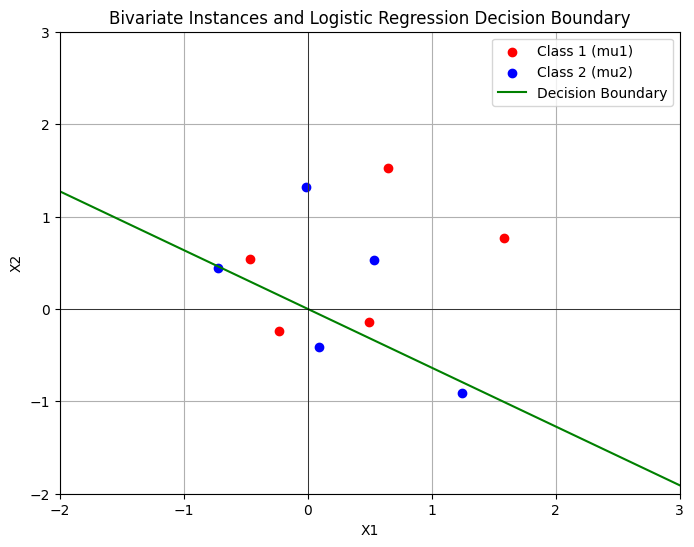

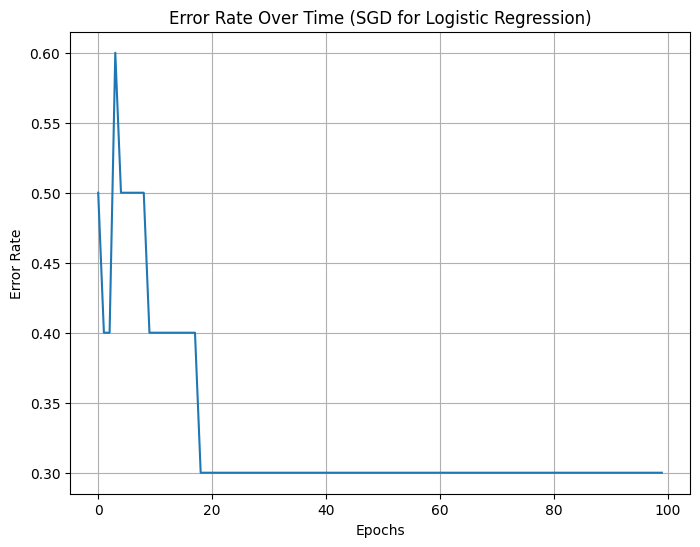

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression using Stochastic Gradient Descent (SGD)
def logistic_sgd(X, y, learning_rate, epochs):
    weights = np.random.randn(X.shape[1])  # Random initialization of weights
    errors = []  # To track the error at each epoch
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            z = np.dot(X[i], weights)  # Linear combination of inputs and weights
            h = sigmoid(z)  # Predicted probability using sigmoid
            gradient = (h - y[i]) * X[i]  # Gradient calculation
            weights -= learning_rate * gradient  # Update the weights using SGD
            
        # After every epoch, compute the prediction accuracy
        y_pred = (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)  # Predict labels
        errors.append(np.mean(y_pred != y))  # Track the mean error
    return weights, errors

# Generate bivariate instances for two normal distributions
mu1 = np.array([0, 0])
mu2 = np.array([1, 1])
sigma1 = np.eye(2)  # Identity matrix for Σ1
sigma2 = np.eye(2)  # Identity matrix for Σ2

# Generate 5 samples from each distribution
np.random.seed(42)  # For reproducibility
samples1 = np.random.multivariate_normal(mu1, sigma1, 5)
samples2 = np.random.multivariate_normal(mu2, sigma2, 5)

# Combine the data and create class labels
X = np.vstack((samples1, samples2))
y = np.hstack((np.zeros(5), np.ones(5)))  # Class 1 has label 0, Class 2 has label 1

# Train the logistic regression model using SGD
learning_rate = 0.2  # You can tune this parameter
epochs = 100
weights, errors = logistic_sgd(X, y, learning_rate, epochs)

# Calculate the accuracy of the logistic regression model
y_pred = (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)  # Predict labels
accuracy = np.mean(y_pred == y) * 100
print(f"Accuracy: {accuracy}%")

# Plot the bivariate instances and the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], color='red', label='Class 1 (mu1)')
plt.scatter(samples2[:, 0], samples2[:, 1], color='blue', label='Class 2 (mu2)')

# Decision boundary: w^T x + w0 = 0 -> x2 = (-w0 - w1*x1)/w2
x_vals = np.linspace(-2, 3, 100)
y_vals = -(weights[0] * x_vals) / weights[1]
plt.plot(x_vals, y_vals, label=r'Decision Boundary:w^T x + w0 = 0 -> x2 = (-w0 - w1*x1)/w2', color='green')

# Plot labels and legend
plt.xlim([-2, 3])
plt.ylim([-2, 3])
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Bivariate Instances and Logistic Regression Decision Boundary')
plt.grid(True)
plt.show()

# Plot the error over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.title('Error Rate Over Time (SGD for Logistic Regression)')
plt.grid(True)
plt.show()


### Explanation of the Code

- **Parameters**:
  - `mu1 = [0, 0]` and `mu2 = [1, 1]` are the mean vectors for the two normal distributions, representing class 1 and class 2 respectively.
  - `cov1` and `cov2` are identity matrices ($\Sigma_1$ and $\Sigma_2$), which represent no correlation between the two variables for each class (bivariate normal distributions).

- **Sample Generation**: 
  - `np.random.multivariate_normal(mu1, cov1, 5)` generates 5 bivariate samples from the distribution $\mathcal{N}(\mu_1, \Sigma_1)$.
  - `np.random.multivariate_normal(mu2, cov2, 5)` generates 5 bivariate samples from the distribution $\mathcal{N}(\mu_2, \Sigma_2)$.

- **Decision Boundary**: 
  - The decision boundary is defined by the linear equation $w^T x + w_0 = 0$, where `w` is a weight vector and `w0` is a bias term.
  - The boundary separates the two classes based on the linear function of the form: $y = -\frac{w_0 + w_1 \cdot x_1}{w_2}$.
  
- **Plotting**:
  - `plt.scatter` is used to plot the samples from the two classes with distinct colors (red for class 1 and blue for class 2).
  - The decision boundary is plotted using `plt.plot`, based on the function `decision_boundary(x)`.
  - The plot includes grid lines, axes labels, and a legend to distinguish between the two classes and the decision boundary.

This code snippet visualizes the two classes and their linear separation in a 2D Cartesian plane.
